In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,ZeroPadding2D,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [42]:
data_generator=ImageDataGenerator(rescale=1./255)
train=data_generator.flow_from_directory('pet_train/',target_size=(250,250),batch_size=50,class_mode='binary')

Found 865 images belonging to 2 classes.


In [43]:
test=data_generator.flow_from_directory('pet_test/',target_size=(250,250),batch_size=50,class_mode='binary')


Found 400 images belonging to 2 classes.


In [51]:
model=Sequential()
model.add(Conv2D(64,(3,3),
                 activation='relu',
                 input_shape=(250,250,3)
                 ,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [52]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 250, 250, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │     4,920,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,995,989 (19.06 MB)

 Trainable params: 4,995,989 (19.06 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer=Adam(),  loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(train,steps_per_epoch=len(train),epochs=10,validation_data=test,validation_steps=len(test))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5376 - loss: 1.3611 - val_accuracy: 0.5000 - val_loss: 0.7113
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5376 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.7000
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5376 - loss: 0.6898 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5376 - loss: 0.6815 - val_accuracy: 0.5000 - val_loss: 0.7131
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5376 - loss: 0.6820 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5376 - loss: 0.6692 - val_accuracy: 0.5000 - val_loss: 0.6727
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6012 - loss: 0.6617 - val_accuracy: 0.5475 - val_loss: 0.6765
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6497 - loss: 0.6401 - val_accuracy: 0.7000 - val_loss:

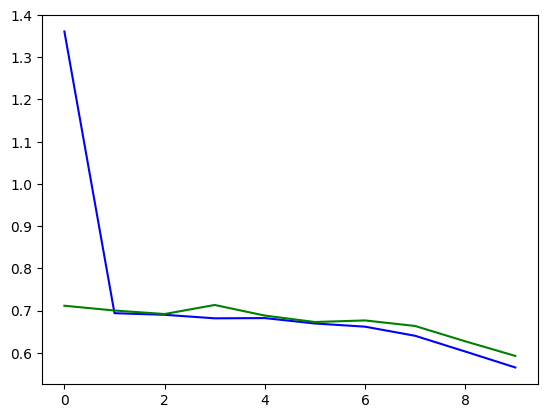

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue',label="train data")
plt.plot(history.history['val_loss'],color='green',label="validation data")

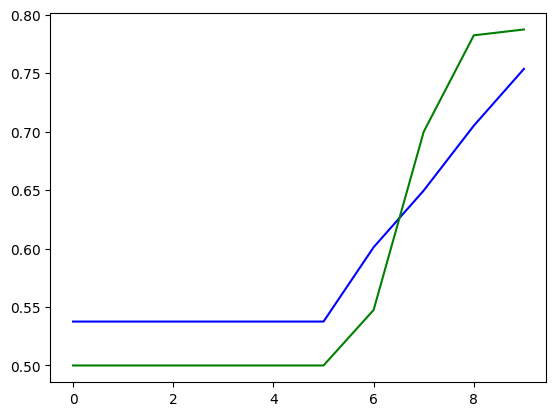

In [56]:
plt.plot(history.history['accuracy'], color='blue', label="train data")
plt.plot(history.history['val_accuracy'], color='green', label="validation data")

In [58]:
model.save("cat_dog.keras")